In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip 'drive/MyDrive/DEEP_2024-1/TA/dataset.zip'

Streaming output truncated to the last 5000 lines.
  inflating: train/images/cardboard147_jpg.rf.30efb142a0aae74f1fef2b1ae46157fd.jpg  
  inflating: train/images/cardboard148_jpg.rf.0b290f4b230dd569ff67ff981674859d.jpg  
  inflating: train/images/cardboard15_jpg.rf.a5c2cd1a638edb96e6bccbd9e00f9e63.jpg  
  inflating: train/images/cardboard150_jpg.rf.59ab6bdd4ae098911068e9703a092abe.jpg  
  inflating: train/images/cardboard151_jpg.rf.15481cdd5831ba7cf58b631ef0b5965b.jpg  
  inflating: train/images/cardboard152_jpg.rf.e208e9762b63e2630ec0460c7798c70a.jpg  
  inflating: train/images/cardboard153_jpg.rf.d4ecdcc8e04589c3281835938689aa6e.jpg  
  inflating: train/images/cardboard154_jpg.rf.31e7650e5dc0e1beedc150048b9ec7fb.jpg  
  inflating: train/images/cardboard157_jpg.rf.f59ae991fc025b9f58e06b6456b33dfb.jpg  
  inflating: train/images/cardboard158_jpg.rf.71d0794ce1c4283d5fb66b04dd103139.jpg  
  inflating: train/images/cardboard159_jpg.rf.e4ad5c9faab61c7b312abd50b602af06.jpg  
  inflating: tr

In [ ]:
# Instalar la biblioteca ultralytics
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.6/779.6 kB 3.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
import os
directory_path = '/content/train'  # Reemplazar esto con la ruta al directorio

if os.path.exists(directory_path):
    print("El directorio existe.")
else:
    print("El directorio no existe.")

El directorio existe.


In [ ]:
from ultralytics import YOLO

# Cargar el modelo
model = YOLO("yolov8n.yaml")  # construir un modelo

# Entrenar el modelo
model.train(data="config.yaml", epochs=100)  # entrenamiento
metrics = model.val()  # evaluar rendimiento del modelo
results = model("basura.jpg")  # predecir una imagen
path = model.export(format="onnx")  # exportar el modelo al formato ONNX

Ultralytics YOLOv8.2.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=config.yaml, epochs=3, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line

100%|██████████| 755k/755k [00:00<00:00, 4.52MB/s]


Overriding model.yaml nc=80 with nc=6

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/train/labels... 2015 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2015/2015 [00:01<00:00, 1164.66it/s]


train: New cache created: /content/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/valid/labels... 504 images, 0 backgrounds, 0 corrupt: 100%|██████████| 504/504 [00:00<00:00, 1177.04it/s]

val: New cache created: /content/valid/labels.cache


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train2
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3         0G      3.048      4.228      4.145         35        640: 100%|██████████| 126/126 [27:10<00:00, 12.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [02:42<00:00, 10.15s/it]

                   all        504        505      0.838     0.0357    0.00674    0.00116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3         0G      2.796      3.859      3.604         39        640: 100%|██████████| 126/126 [27:20<00:00, 13.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [02:39<00:00,  9.95s/it]

                   all        504        505      0.192      0.154      0.029    0.00805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3         0G      2.252      3.476      3.029         39        640: 100%|██████████| 126/126 [27:26<00:00, 13.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [02:39<00:00,  9.94s/it]

                   all        504        505      0.333      0.176      0.124      0.052



3 epochs completed in 1.503 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.2MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.2.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n summary (fused): 168 layers, 3006818 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [02:28<00:00,  9.26s/it]


                   all        504        505      0.333      0.176      0.123     0.0519
             cardboard         84         84      0.162        0.5      0.283      0.108
                 glass         89         89      0.108     0.0449     0.0526     0.0159
                 metal         86         86      0.455      0.175      0.226      0.119
                 paper        113        113      0.181       0.31      0.106     0.0431
               plastic        103        103     0.0938     0.0291     0.0468     0.0142
                 trash         29         30          1          0     0.0242     0.0119
Speed: 5.9ms preprocess, 273.2ms inference, 0.0ms loss, 4.5ms postprocess per image
Results saved to runs/detect/train2
Ultralytics YOLOv8.2.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n summary (fused): 168 layers, 3006818 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/valid/labels.cache... 504 images, 0 backgrounds, 0 corrupt: 100%|██████████| 504/504 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [02:17<00:00,  4.29s/it]


                   all        504        505      0.333      0.176      0.123     0.0519
             cardboard         84         84      0.162        0.5      0.283      0.108
                 glass         89         89      0.108     0.0449     0.0526     0.0159
                 metal         86         86      0.455      0.175      0.226      0.119
                 paper        113        113      0.181       0.31      0.106     0.0431
               plastic        103        103     0.0938     0.0291     0.0468     0.0142
                 trash         29         30          1          0     0.0242     0.0119
Speed: 2.8ms preprocess, 257.3ms inference, 0.0ms loss, 4.3ms postprocess per image
Results saved to runs/detect/train22

image 1/1 /content/basura.jpg: 448x640 (no detections), 168.5ms
Speed: 4.9ms preprocess, 168.5ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)
Ultralytics YOLOv8.2.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)

PyTorch:


image 1/1 /content/glass295_jpg.rf.aaa1c228058b505b2ad3851ba8c7fde9.jpg: 640x640 (no detections), 313.6ms
Speed: 5.5ms preprocess, 313.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


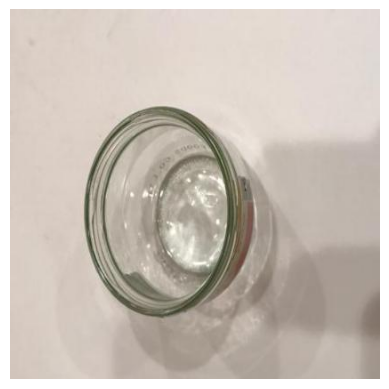

In [ ]:
results = model("glass295_jpg.rf.aaa1c228058b505b2ad3851ba8c7fde9.jpg")  # predecir una imagen

import matplotlib.pyplot as plt
import cv2
# Asegúrate de que 'results' no esté vacío y es del tipo esperado
if results and isinstance(results, list):
    for result in results:
        # Renderizar la imagen con las predicciones
        img_with_boxes = result.plot()

        # Convertir la imagen de BGR a RGB (si es necesario)
        img_with_boxes_rgb = cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB)

        # Mostrar la imagen
        plt.imshow(img_with_boxes_rgb)
        plt.axis('off')  # Ocultar los ejes
        plt.show()
else:
    print("No se encontraron resultados.")


In [ ]:
!ls /content/runs


ls: cannot access '/content/runs/detected': No such file or directory


In [ ]:
import shutil

folder_path = '/content/runs'
output_filename = '/content/runs.zip'

shutil.make_archive(output_filename.replace('.zip', ''), 'zip', folder_path)


'/content/runs.zip'